In [2]:
import kagglehub
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando dataset a ser analisado

In [4]:
path = kagglehub.dataset_download("rehan497/students-social-media-addiction")
#print('Path to dataset:', path)

In [5]:
dataset = pd.read_csv('students_social_media_addiction.csv', delimiter=',')
#print(dataset.head())
print(dataset.shape)

(705, 13)


## Limpeza de dados

In [6]:
dataset.dropna(inplace=True)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

# não há valores nulos ou duplicados

(705, 13)


## Estudando dataset, informações e dimensões

In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

##### 1. Análise por idade dos indivíduos

Idade máxima: 24
Idade mínima: 18

Valor médio de uso: 20.6596


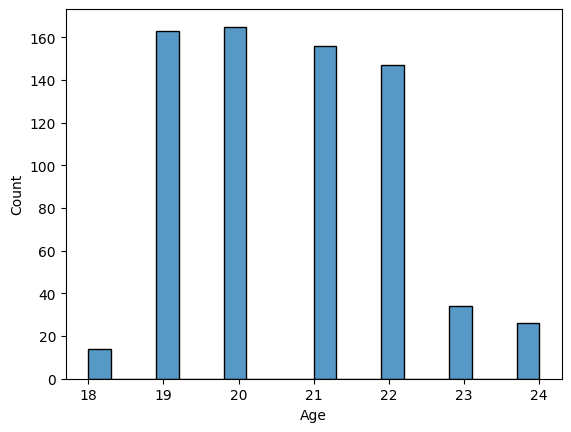

In [8]:
idademax = dataset['Age'].max()
idademin = dataset['Age'].min()
print('Idade máxima:',idademax)
print('Idade mínima:',idademin)
print('')
mediaidade = dataset['Age'].mean().__round__(4)
print('Valor médio de uso:',mediaidade)

sns.histplot(data=dataset, x='Age', bins=20)
plt.show()

##### 2. Análise de gêneros

Quantidade de indivíduos entrevistados de cada gênero Gender
Female    353
Male      352
dtype: int64


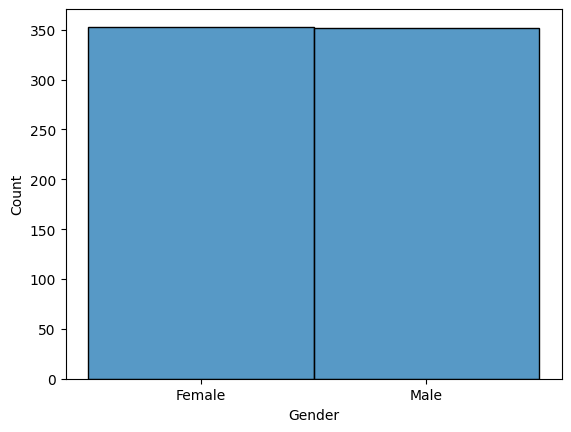

In [9]:
quantgen = dataset.groupby('Gender').size()
print('Quantidade de indivíduos entrevistados de cada gênero', quantgen)

sns.histplot(data=dataset, x='Gender', bins=20)
plt.show()

##### 3. Análise níveis acadêmicos

Níveis acadêmicos: Academic_Level
Graduate         325
High School       27
Undergraduate    353
dtype: int64


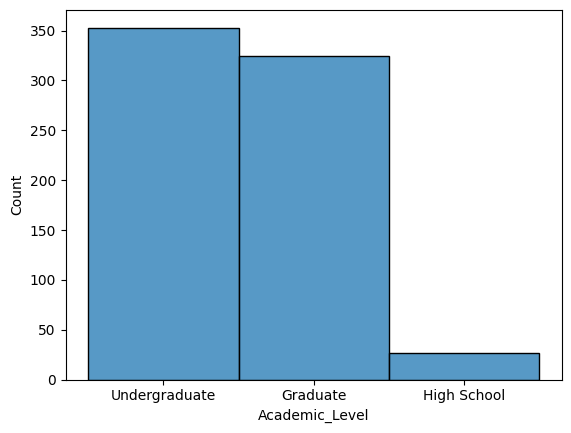

In [10]:
niveisacad = dataset.groupby('Academic_Level')
print('Níveis acadêmicos:',niveisacad.size())
# 3 níveis acadêmicos diferentes analisados
# O que mais aparece: Graduandos
# O que menos aparece: Ensino Médio 

sns.histplot(data=dataset, x='Academic_Level', bins=20)
plt.show()

##### 4. Análise dos países

Número de países distintos: 110

Country
India          53
USA            40
Canada         34
France         27
Mexico         27
Spain          27
Turkey         27
Ireland        27
Denmark        27
Switzerland    27
UK             22
Japan          21
Italy          21
Russia         21
Bangladesh     20
Maldives       19
Sri Lanka      19
Nepal          19
Pakistan       19
China          16
Poland         16
Germany        14
Australia      14
South Korea    13
UAE             8
Singapore       8
New Zealand     8
Brazil          8
Malaysia        8
Netherlands     8
Finland         8
Name: count, dtype: int64



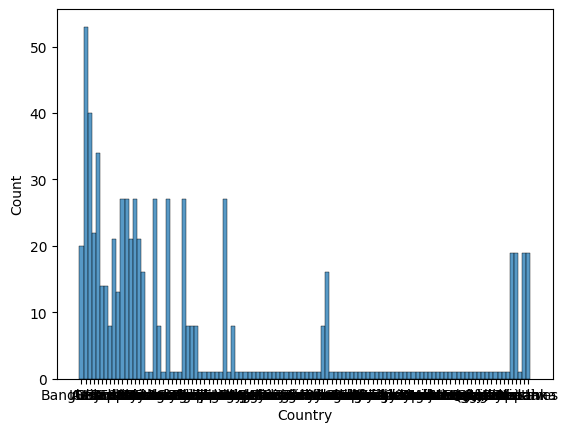

In [11]:
quantpaises = dataset['Country'].nunique()
#Fonte: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html
print('Número de países distintos:', quantpaises)
print('')
paises = dataset['Country'].value_counts()
print(paises.head(31)) # depois desse head, os países aparecem apenas 1 vez
# País que mais aparece: India
# Muitos países aparecem apenas 1 vez
print('')

sns.histplot(data=dataset, x='Country', bins=1)
plt.show()

##### 5. Análise da média de uso diário

Valor máximo: 8.5
Valor mínimo: 1.5

Valor médio de uso: 4.9187


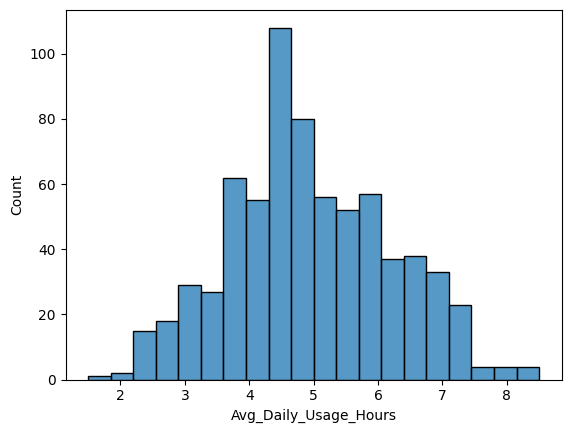

In [12]:
usomediomax = dataset['Avg_Daily_Usage_Hours'].max()
usomediomin = dataset['Avg_Daily_Usage_Hours'].min()
print('Valor máximo:',usomediomax)
print('Valor mínimo:',usomediomin)
print('')
mediadeuso = dataset['Avg_Daily_Usage_Hours'].mean().__round__(4)
print('Valor médio de uso:',mediadeuso)

sns.histplot(data=dataset, x='Avg_Daily_Usage_Hours', bins=20)
plt.show()


##### 6. Análise de plataformas mais utilizadas

Quantidade de plataformas 12

PLataformas mais usadas: Most_Used_Platform
Facebook     123
Instagram    249
KakaoTalk     12
LINE          12
LinkedIn      21
Snapchat      13
TikTok       154
Twitter       30
VKontakte     12
WeChat        15
WhatsApp      54
YouTube       10
dtype: int64


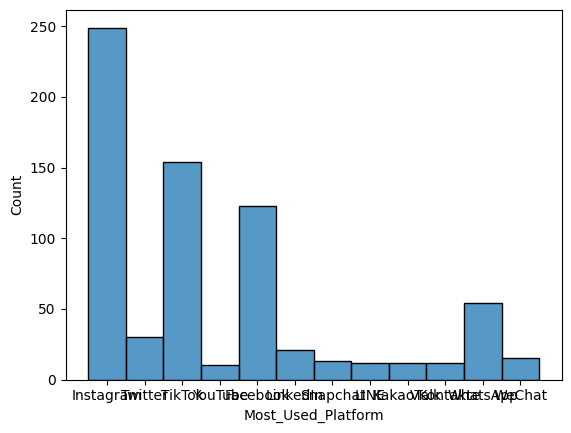

In [13]:
quantplataformas = dataset['Most_Used_Platform'].nunique()
print('Quantidade de plataformas', quantplataformas)
print('')
plataformas = dataset.groupby('Most_Used_Platform')
print('PLataformas mais usadas:', plataformas.size())

sns.histplot(data=dataset, x='Most_Used_Platform', bins=20)
plt.show()

##### 7. Análise do impacto na performance acadêmica

Impacto na performance acadêmica: Affects_Academic_Performance
No     252
Yes    453
dtype: int64


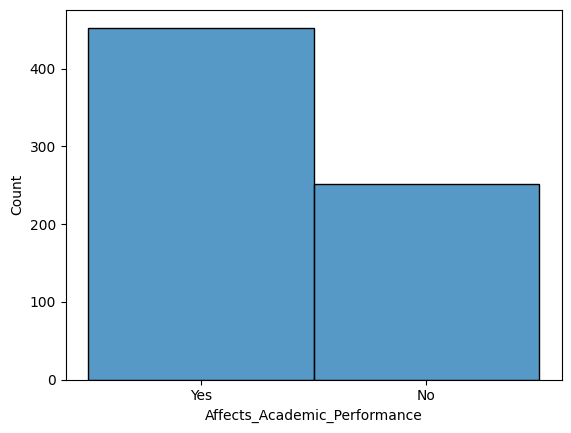

In [14]:
quantresp = dataset.groupby('Affects_Academic_Performance').size()
print('Impacto na performance acadêmica:', quantresp)

sns.histplot(data=dataset, x='Affects_Academic_Performance', bins=20)
plt.show()

##### 8. Horas de sono por noite

Maior quantidade de sono registrada: 9.6
Menor quantidade de sono registrada: 3.8

Quantidade média de horas de sono: 6.8689


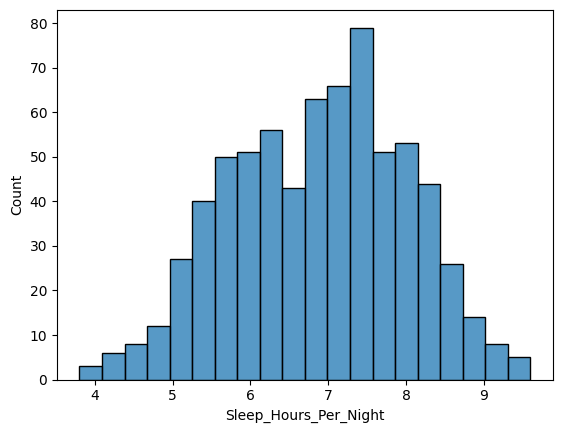

In [15]:
maxhoras = dataset['Sleep_Hours_Per_Night'].max()
minhoras = dataset['Sleep_Hours_Per_Night'].min()
print('Maior quantidade de sono registrada:',maxhoras)
print('Menor quantidade de sono registrada:',minhoras)
print('')
mediadehoras = dataset['Sleep_Hours_Per_Night'].mean().__round__(4)
print('Quantidade média de horas de sono:',mediadehoras)

sns.histplot(data=dataset, x='Sleep_Hours_Per_Night', bins=20)
plt.show()


##### 9. Avaliações da saúde mental dos alunos

Maior nota registrada: 9
Menor nota registrada: 4

Nota média para a saúde mental: 6.227


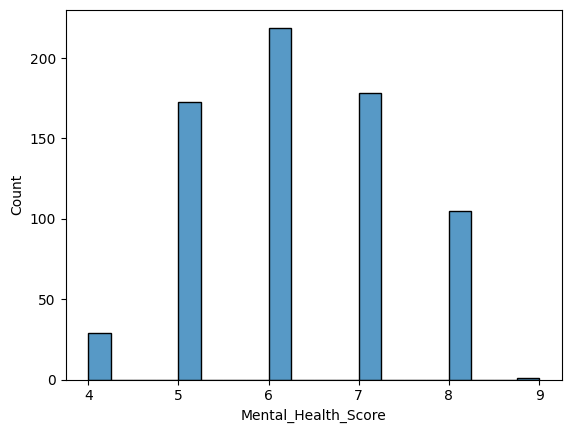

In [16]:
scoremax = dataset['Mental_Health_Score'].max()
scoremin = dataset['Mental_Health_Score'].min()
print('Maior nota registrada:',scoremax)
print('Menor nota registrada:',scoremin)
print('')
mediadasnotas = dataset['Mental_Health_Score'].mean().__round__(4)
print('Nota média para a saúde mental:',mediadasnotas)

sns.histplot(data=dataset, x='Mental_Health_Score', bins=20)
plt.show()

##### 10. Status de relacionamento

Status de relacionamentos registrados: 3

Relationship_Status
Complicated         32
In Relationship    289
Single             384
dtype: int64


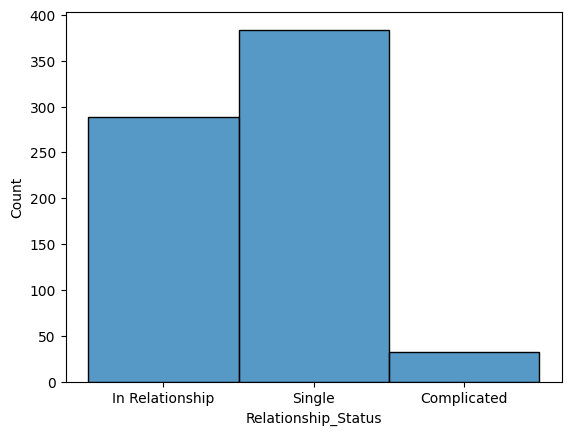

In [17]:
quantstatus = dataset['Relationship_Status'].nunique()
print('Status de relacionamentos registrados:',quantstatus)
print('')
status = dataset.groupby('Relationship_Status').size()
print(status)

sns.histplot(data=dataset, x='Relationship_Status', bins=20)
plt.show()

##### 11. Análise de conflitos nas redes sociais

Maior quantidade de conflitos registrada: 5
Menor quantidade de conflitos registrada: 0

Quantidade média de conflitos registrados: 2.8496


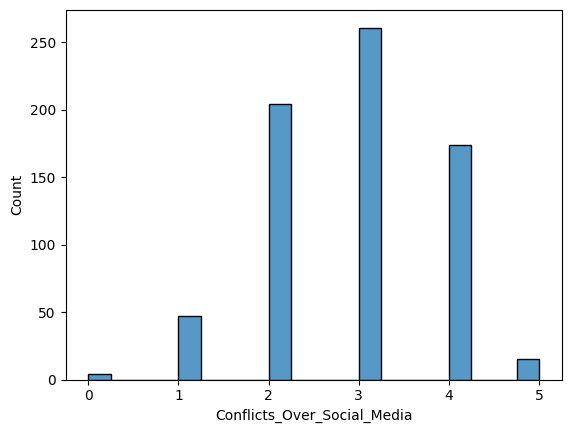

In [18]:
maxconflitos = dataset['Conflicts_Over_Social_Media'].max()
minconflitos = dataset['Conflicts_Over_Social_Media'].min()
print('Maior quantidade de conflitos registrada:',maxconflitos)
print('Menor quantidade de conflitos registrada:',minconflitos)
print('')
mediadehoras = dataset['Conflicts_Over_Social_Media'].mean().__round__(4)
print('Quantidade média de conflitos registrados:',mediadehoras)

sns.histplot(data=dataset, x='Conflicts_Over_Social_Media', bins=20)
plt.show()

##### 12. Análise de notas atribuídas para vício

Maior nota para vício registrada: 9
Menor nota para vício registrada: 2

Nota média de vício: 6.4369


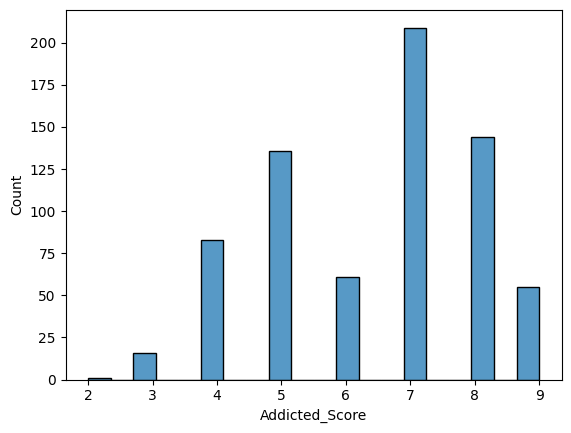

In [19]:
maiorvicio = dataset['Addicted_Score'].max()
menorvicio = dataset['Addicted_Score'].min()
print('Maior nota para vício registrada:',maiorvicio)
print('Menor nota para vício registrada:',menorvicio)
print('')
mediadevicio = dataset['Addicted_Score'].mean().__round__(4)
print('Nota média de vício:',mediadevicio)

sns.histplot(data=dataset, x='Addicted_Score', bins=20)
plt.show()

## Análise de relações

In [20]:
dataset.describe().T
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe

,count,mean,std,min,25%,50%,75%,max
Student_ID,705.0,353.000000,203.660256,1.0,177.0,353.0,529.0,705.0
Age,705.0,20.659574,1.399217,18.0,19.0,21.0,22.0,24.0
Avg_Daily_Usage_Hours,705.0,4.918723,1.257395,1.5,4.1,4.8,5.8,8.5
Sleep_Hours_Per_Night,705.0,6.868936,1.126848,3.8,6.0,6.9,7.7,9.6
Mental_Health_Score,705.0,6.226950,1.105055,4.0,5.0,6.0,7.0,9.0
Conflicts_Over_Social_Media,705.0,2.849645,0.957968,0.0,2.0,3.0,4.0,5.0
Addicted_Score,705.0,6.436879,1.587165,2.0,5.0,7.0,8.0,9.0


<Axes: >

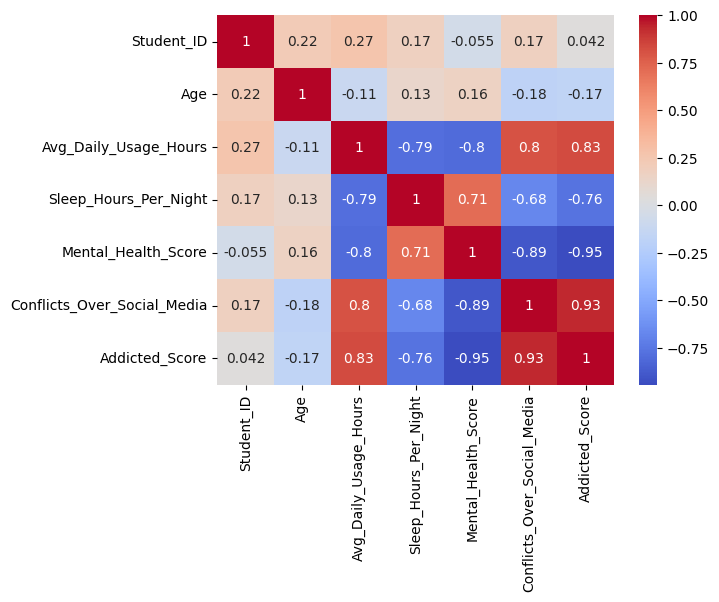

In [27]:
corr = dataset.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

### Qual a correlação entre o gênero feminino/masculino com o uso diário de redes sociais?

<Axes: title={'center': 'Relação entre horas de sono e uso diário de redes sociais'}, xlabel='Gender', ylabel='Avg_Daily_Usage_Hours'>

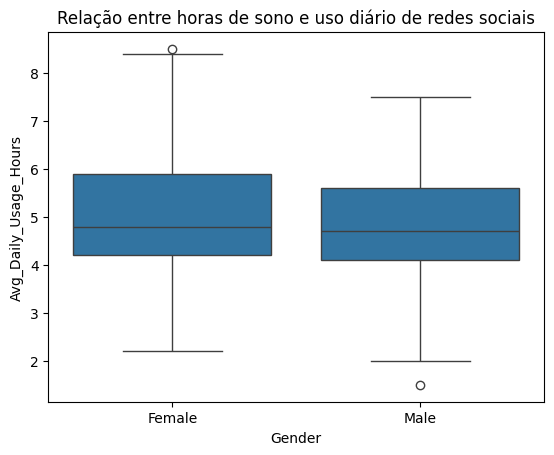

In [46]:
#sns.scatterplot(data=dataset, x="total_bill", y="tip", hue="sex")
# hue é uma variável categórica que define a cor dos pontos
#sns.scatterplot(data=dataset, x='Sleep_Hours_Per_Night', y='Avg_Daily_Usage_Hours', hue='Addicted_Score')
plt.title('Relação entre horas de sono e uso diário de redes sociais')


sns.boxplot(x='Gender', y='Avg_Daily_Usage_Hours', data=dataset)
# pelo gráfico, percebe-se
##################

### Qual a relação entre as horas diárias de uso e a rede social?

<Axes: xlabel='Most_Used_Platform', ylabel='Avg_Daily_Usage_Hours'>

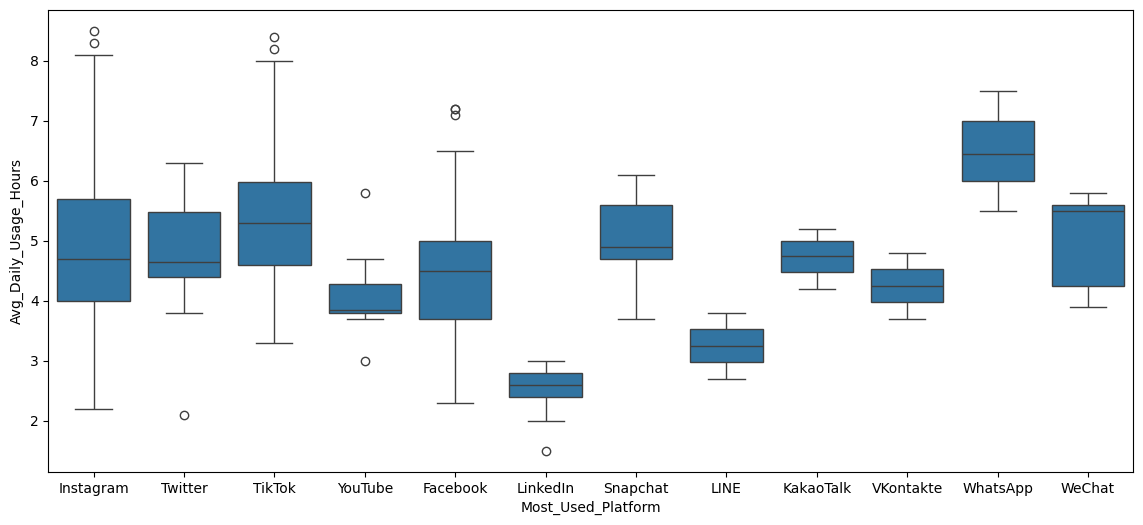

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Most_Used_Platform', y='Avg_Daily_Usage_Hours', data=dataset)

### Há relação entre as horas de sono com o score de vício e/ou score de saúde mental?

<Axes: xlabel='Mental_Health_Score', ylabel='Avg_Daily_Usage_Hours'>

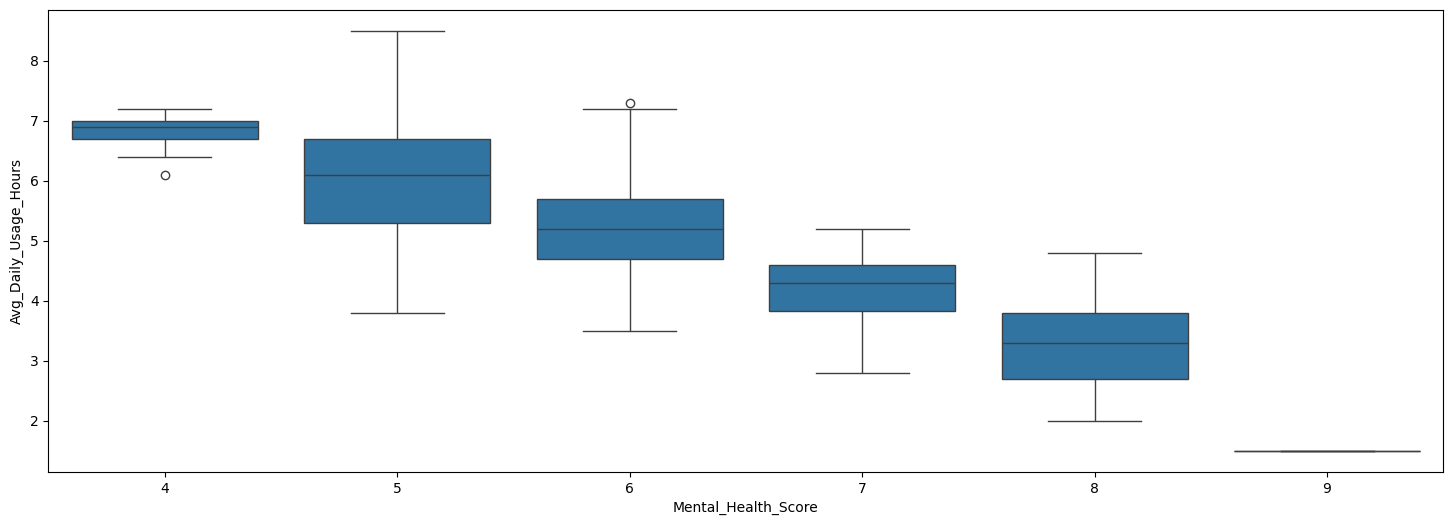

In [50]:
plt.figure(figsize=(18,6))
sns.boxplot(x='Mental_Health_Score', y='Avg_Daily_Usage_Hours', data=dataset)

### Pessoas que passam mais tempo nas redes sociais tendem a ter mais conflitos? e existe alguma rede social onde essas tendências são maiores?

<Axes: >

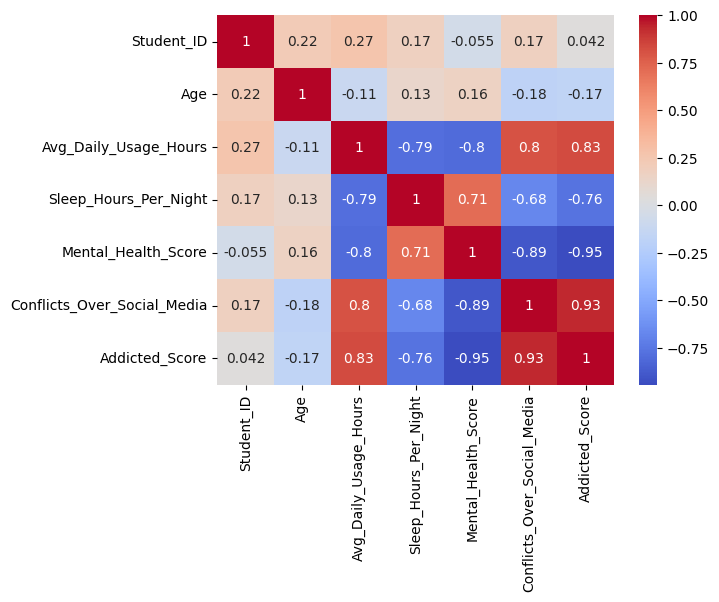

In [ ]:
corr = dataset.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm")

##### Alta correlação entre o tempo médio em redes sociais e a quantidade de conflitos em redes sociais.

In [ ]:
redes_sociais = dataset.groupby('Most_Used_Platform')['Conflicts_Over_Social_Media'].mean()
print(redes_sociais)

Most_Used_Platform
Facebook     2.430894
Instagram    2.939759
KakaoTalk    3.000000
LINE         1.000000
LinkedIn     0.904762
Snapchat     3.230769
TikTok       3.409091
Twitter      2.433333
VKontakte    2.000000
WeChat       2.533333
WhatsApp     3.462963
YouTube      2.200000
Name: Conflicts_Over_Social_Media, dtype: float64
